In [16]:
import cv2,os
import numpy as np
import csv
import glob

label = "Parasitized"
dirList = glob.glob("cell_images/"+label+"/*.png")
#print(dirList)
file = open("malaria.csv","a")

for img_path in dirList:

	im = cv2.imread(img_path)
	print(img_path)
	im = cv2.GaussianBlur(im,(5,5),2)



	im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

	ret,thresh = cv2.threshold(im_gray,127,255,0)
	contours,h = cv2.findContours(thresh,1,2)
	
	for contour in contours:
		cv2.drawContours(im_gray, contours, -1, (0,255,0), 3)
	

	cv2.imshow("window",im_gray)

	break


	file.write(label)
	file.write(",")

	for i in range(5):
		try:
			area = cv2.contourArea(contours[i])
			file.write(str(area))
		except:
			file.write("0")

		file.write(",")

	
	file.write("\n")


cv2.waitKey(19000)

-1

In [17]:
# Testing Images
import cv2,os
import numpy as np
import csv
import glob

label = "Parasitized"
dirList = glob.glob("test_cells/"+"/*.png")
#print(dirList)
file = open("test_malaria.csv","a")

for img_path in dirList:

	im = cv2.imread(img_path)
	print(img_path)
	im = cv2.GaussianBlur(im,(5,5),2)



	im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

	ret,thresh = cv2.threshold(im_gray,127,255,0)
	contours,h = cv2.findContours(thresh,1,2)
	
	for contour in contours:
		cv2.drawContours(im_gray, contours, -1, (0,255,0), 3)
	

	cv2.imshow("window",im_gray)


    
	for i in range(5):
		try:
			area = cv2.contourArea(contours[i])
			file.write(str(area))
		except:
			file.write("0")

		file.write(",")

	
	file.write("\n")


cv2.waitKey(19000)

test_cells\C1_thinF_IMG_20150604_104722_cell_15.png
test_cells\C1_thinF_IMG_20150604_104722_cell_60.png
test_cells\C1_thinF_IMG_20150604_104722_cell_66.png
test_cells\C1_thinF_IMG_20150604_104722_cell_73.png
test_cells\C1_thinF_IMG_20150604_104722_cell_9.png
test_cells\C33P1thinF_IMG_20150619_114756a_cell_179.png
test_cells\C33P1thinF_IMG_20150619_114756a_cell_180.png
test_cells\C33P1thinF_IMG_20150619_114756a_cell_181.png
test_cells\C33P1thinF_IMG_20150619_114756a_cell_182.png
test_cells\C33P1thinF_IMG_20150619_115740a_cell_161.png


-1

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

##Step1: Load Dataset

dataframe = pd.read_csv("malaria.csv")
#print(dataframe.head())

#Step2: Split into training and test data
x = dataframe.drop(["Label"],axis=1)
y = dataframe["Label"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

##Step4: Build a model

model = RandomForestClassifier(n_estimators=100,max_depth=5)
model.fit(x_train,y_train)


##Step5: Make predictions and get classification report

predictions = model.predict(x_test)

print(metrics.classification_report(predictions,y_test))
print(model.score(x_test,y_test))


              precision    recall  f1-score   support

 Parasitized       0.90      0.90      0.90      2771
  Uninfected       0.90      0.89      0.90      2741

   micro avg       0.90      0.90      0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512

0.898766328011611


In [19]:
df=pd.read_csv("test_malaria.csv",names=['a1','a2','a3','a4','a5'])

In [20]:
del df['a5']

In [21]:
df

,a1,a2,a3,a4
0,9056.5,0.0,0.0,0
1,12675.5,0.0,0.0,0
2,8270.5,0.0,0.0,0
3,8700.0,0.0,0.0,0
4,9415.0,0.0,0.0,0
5,60.5,68.0,72.5,16005
6,82.5,13849.5,0.0,0
7,258.5,14255.5,0.0,0
8,15630.5,0.0,0.0,0
9,121.5,10952.5,0.0,0


In [22]:
df.reset_index(inplace=True)

In [23]:
df.rename(columns={'index':'a0'},inplace=True)

In [24]:
df

,a0,a1,a2,a3,a4
0,0,9056.5,0.0,0.0,0
1,1,12675.5,0.0,0.0,0
2,2,8270.5,0.0,0.0,0
3,3,8700.0,0.0,0.0,0
4,4,9415.0,0.0,0.0,0
5,5,60.5,68.0,72.5,16005
6,6,82.5,13849.5,0.0,0
7,7,258.5,14255.5,0.0,0
8,8,15630.5,0.0,0.0,0
9,9,121.5,10952.5,0.0,0


In [25]:
import matplotlib.pyplot as plt

In [26]:
import glob
dirList = glob.glob("test_cells"+"/*.png")
l=[]
for i in dirList:
    l.append(i.lstrip('test_cells\\'))
l

['C1_thinF_IMG_20150604_104722_cell_15.png',
 'C1_thinF_IMG_20150604_104722_cell_60.png',
 'C1_thinF_IMG_20150604_104722_cell_66.png',
 'C1_thinF_IMG_20150604_104722_cell_73.png',
 'C1_thinF_IMG_20150604_104722_cell_9.png',
 'C33P1thinF_IMG_20150619_114756a_cell_179.png',
 'C33P1thinF_IMG_20150619_114756a_cell_180.png',
 'C33P1thinF_IMG_20150619_114756a_cell_181.png',
 'C33P1thinF_IMG_20150619_114756a_cell_182.png',
 'C33P1thinF_IMG_20150619_115740a_cell_161.png']

(Text(0.5, 1.0, 'Parasitized'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

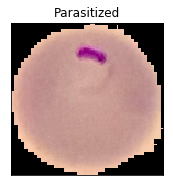

In [36]:
import imageio
plt.subplot(121),plt.imshow(imageio.imread('test_cells//'+'C33P1thinF_IMG_20150619_114756a_cell_181.png'))
plt.title(model.predict([df.iloc[i]])[0]),plt.xticks([]),plt.yticks([])    

In [28]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline

In [29]:
import matplotlib.pyplot as plt

(Text(0.5, 1.0, 'Parasitized'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

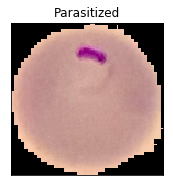

In [35]:
plt.subplot(122),plt.imshow(imageio.imread('test_cells//'+'C33P1thinF_IMG_20150619_114756a_cell_181.png'))
plt.title(model.predict([df.iloc[i]])[0]),plt.xticks([]),plt.yticks([])    